<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/SHIFT/202210/t35_Aula_7_KMeans_pyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

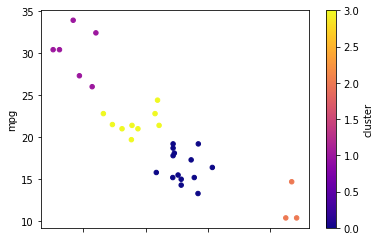

In [37]:
# Carga de bibliotecas
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Carga de dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/%20mtcars.csv")

# Transformação de dados - normalização/ajuste de escala
# Ajuste de escala manual transformando os dados na mesma proporção
df['wt_2'] = df['wt']*6
# Ajuste de escala com uso de funções do python
scaler = MinMaxScaler(feature_range=(0,1))
df['mpg01'], df['wt01'] = scaler.fit_transform(df[['mpg']]), scaler.fit_transform(df[['wt']])

# Executa o K-means
k = KMeans(n_clusters=4, random_state=1).fit(df[['mpg01','wt01']])

# Adicionar o número do cluster como uma nova variável
df['cluster'] = k.labels_

# Visualização gráfica - dispersão
df.plot.scatter(x='wt', y='mpg', c='cluster', colormap='plasma')

# 7a Aula: 2a Parte - Mais algoritmos
# SVM - Support Vector Machine

In [51]:
# Machine Learning no Titanic com SVM
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# 1.Carga de Dados
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')

# 2. Análise exploratória
# Construção Dummy Sex
dummies_Sex = pd.get_dummies(df['Sex'])
df['SexFemale'] = dummies_Sex['female']
# Construção Dummy Pclass
dummies_Pclass = pd.get_dummies(df['Pclass'], prefix='c')
df['Pclass1'] = dummies_Pclass['c_1']
df['Pclass2'] = dummies_Pclass['c_2']

# Tratamento de dados - preenchimento de idades nulas
ageMed = df['Age'].mean()
df['Age'] = df['Age'].fillna(ageMed)

# 3. Separação de Treino e Teste
# X_treino, X_teste, Y_treino, Y_teste = train_test_split( df[['SexFemale']], df['Survived'], test_size=0.25, random_state=33 )
X_treino, X_teste, Y_treino, Y_teste = train_test_split( df[['SexFemale','Age','Pclass1', 'Pclass2']], df['Survived'], test_size=0.25 )

# 4. Modelos SVM
mod = svm.SVC()  # SVM
mod = mod.fit(X_treino, Y_treino)

# 5. Previsão
Y_prev = mod.predict(X_teste)

# Avaliação de previsões em classificadores
pd.crosstab(Y_prev, Y_teste, margins=True)

Survived,0,1,All
row_0,,,
0,125,84,209
1,5,9,14
All,130,93,223


In [56]:
# Métricas de avaliação de modelos classificadores
print(accuracy_score (Y_teste, Y_prev) )
print(precision_score (Y_teste, Y_prev) )
print(recall_score (Y_teste, Y_prev) )

0.600896860986547
0.6428571428571429
0.0967741935483871


# AutoML com pyCaret

In [58]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.5 MB/s 
     |████████████████████████████████| 4.8 MB 49.4 MB/s 
     |████████████████████████████████| 2.0 MB 43.2 MB/s 
     |████████████████████████████████| 17.0 MB 111 kB/s 
     |████████████████████████████████| 167 kB 55.7 MB/s 
     |████████████████████████████████| 315 kB 51.4 MB/s 
     |████████████████████████████████| 6.8 MB 40.7 MB/s 
     |████████████████████████████████| 636 kB 37.1 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 141 kB 51.4 MB/s 
     |████████████████████████████████| 88 kB 6.6 MB/s 
     |████████████████████████████████| 1.3 MB 55.0 MB/s 
     |████████████████████████████████| 25.9 MB 68.3 MB/s 
     |████████████████████████████████| 1.7 MB 53.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Ins

In [1]:
# 0. Carga de bibliotecas
import pandas as pd
from pycaret.classification import *
# 1.Carga de Dados
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')
# 2. Setup do conjunto
s = setup(df, target='Survived')

,Description,Value
0,session_id,7605
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['PassengerId'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Survived',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
         

In [2]:
# Comparação de Modelos
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8106,0.8475,0.6752,0.8033,0.7300,0.5862,0.5942,0.644
ridge,Ridge Classifier,0.8089,0.0000,0.7129,0.7732,0.7370,0.5880,0.5934,0.047
gbc,Gradient Boosting Classifier,0.8057,0.8390,0.6447,0.8055,0.7120,0.5693,0.5798,0.557
lr,Logistic Regression,0.8042,0.8490,0.7085,0.7651,0.7303,0.5778,0.5835,0.761
et,Extra Trees Classifier,0.8026,0.8484,0.6705,0.7917,0.7185,0.5691,0.5794,0.846
ada,Ada Boost Classifier,0.7977,0.8275,0.7172,0.7516,0.7275,0.5679,0.5736,0.244
lightgbm,Light Gradient Boosting Machine,0.7946,0.8344,0.7004,0.7488,0.7198,0.5587,0.5629,0.162
dt,Decision Tree Classifier,0.7945,0.7689,0.6621,0.7669,0.7060,0.5505,0.5573,0.057
lda,Linear Discriminant Analysis,0.6969,0.6834,0.5813,0.6158,0.5887,0.3509,0.3582,0.298
knn,K Neighbors Classifier,0.6951,0.7090,0.5397,0.6095,0.5715,0.3365,0.3386,0.158


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7605, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [6]:
print(best)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=1724,
                solver='auto', tol=0.001)


In [4]:
evaluate_model(best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7605, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [5]:
dftest = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/test_titanic.csv")
dftest.head(12)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
pr = predict_model(best, data=dftest)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7605, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


In [7]:
pr

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.93
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.77
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.87
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.85
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.99
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.88
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.98
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.99


In [8]:
pr[['Label']]

,Label
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0
